In [82]:
from sklearn.datasets import load_breast_cancer
import pandas as pd, numpy as np, matplotlib.pyplot as plt, matplotlib
plt.style.use('dark_background')
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from yellowbrick.contrib.classifier import DecisionViz

C:\Users\Sayan\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Data Preparation

In [3]:
data=load_breast_cancer()
cancerDF=pd.DataFrame(data.data, columns=data.feature_names)
cancerDF.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
scalar=StandardScaler()
norm=Normalizer()
scaled_data=norm.fit_transform(scalar.fit_transform(cancerDF))

## All Variables

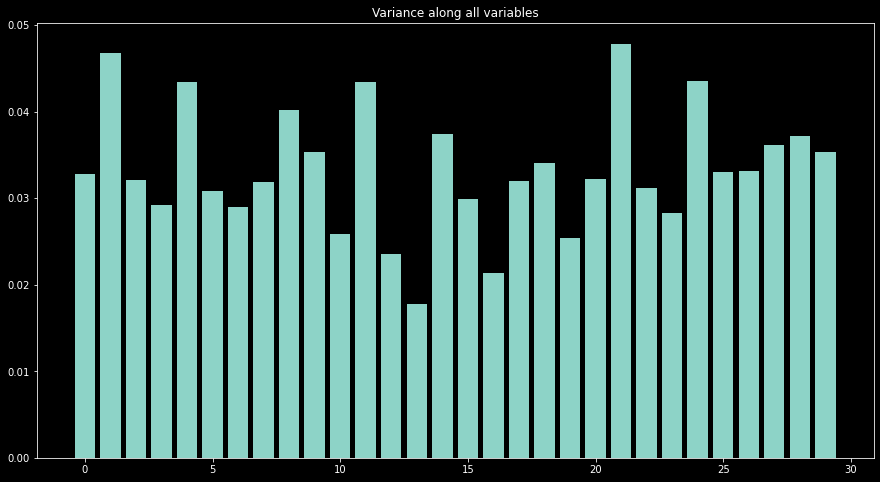

{0: 'mean radius', 1: 'mean texture', 2: 'mean perimeter', 3: 'mean area', 4: 'mean smoothness', 5: 'mean compactness', 6: 'mean concavity', 7: 'mean concave points', 8: 'mean symmetry', 9: 'mean fractal dimension', 10: 'radius error', 11: 'texture error', 12: 'perimeter error', 13: 'area error', 14: 'smoothness error', 15: 'compactness error', 16: 'concavity error', 17: 'concave points error', 18: 'symmetry error', 19: 'fractal dimension error', 20: 'worst radius', 21: 'worst texture', 22: 'worst perimeter', 23: 'worst area', 24: 'worst smoothness', 25: 'worst compactness', 26: 'worst concavity', 27: 'worst concave points', 28: 'worst symmetry', 29: 'worst fractal dimension'}


In [79]:
scaled_var=scaled_data.var(axis=0)
scaled_frac_var=scaled_var/scaled_var.sum()
plt.figure(figsize=(15, 8))
plt.bar(range(len(cancerDF.columns)), scaled_frac_var)
plt.title('Variance along all variables')
plt.show()
print(str(dict(enumerate(cancerDF.columns))))

## PCA2

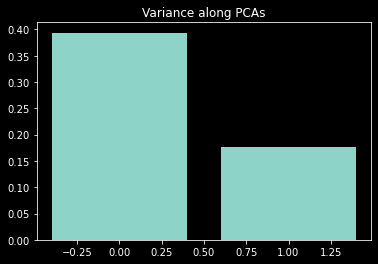

In [25]:
pca=PCA(n_components=2)
data_2d=pca.fit_transform(scaled_data)
plt.bar(range(2), pca.explained_variance_ratio_)
plt.title('Variance along PCAs')
plt.show()

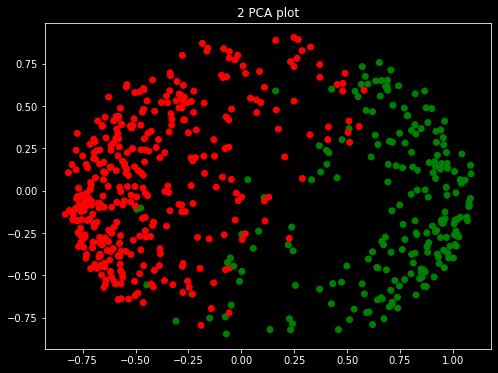

In [10]:
plt.figure(figsize=(8, 6))
color=['red' if l else 'green' for l in data.target]
plt.scatter(data_2d[:, 0], data_2d[:, 1], color=color)
plt.title('2 PCA plot')
plt.show()

## PCA3

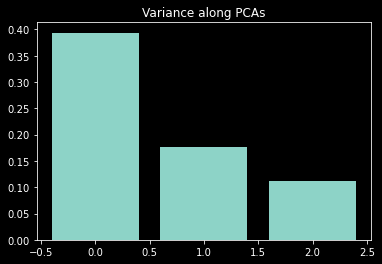

In [12]:
pca=PCA(n_components=3)
data_3d=pca.fit_transform(scaled_data)
plt.bar(range(3), pca.explained_variance_ratio_)
plt.title('Variance along PCAs')
plt.show()

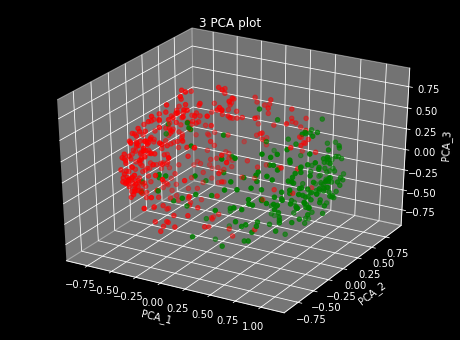

In [19]:
plt.figure(figsize=(8, 6))
plt.style.use('dark_background')
ax = plt.axes(projection ="3d") 
color=['red' if l else 'green' for l in data.target]
ax.scatter3D(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], color=color)
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')
plt.title('3 PCA plot')
plt.show()

## PCA1

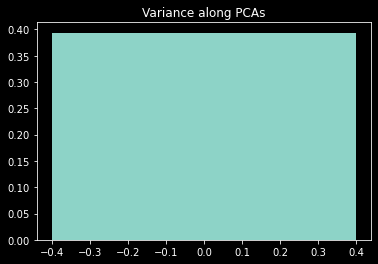

In [16]:
pca=PCA(n_components=1)
data_1d=pca.fit_transform(scaled_data)
plt.bar(range(1), pca.explained_variance_ratio_)
plt.title('Variance along PCAs')
plt.show()

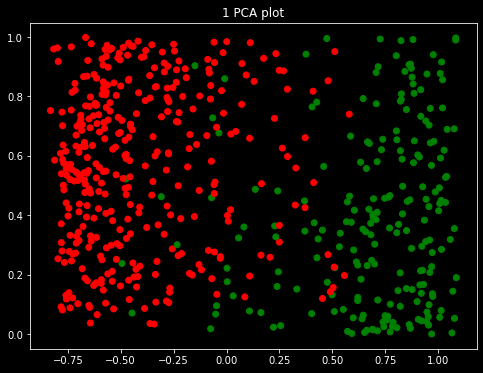

In [47]:
plt.figure(figsize=(8, 6))
plt.style.use('dark_background')
color=['red' if l else 'green' for l in data.target]
plt.scatter(data_1d, np.array(range(len(data_1d)))/len(data_1d), color=color)
plt.title('1 PCA plot')
plt.show()

## Modelling on the PCAs

### PCA2 model

C:\Users\Sayan\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


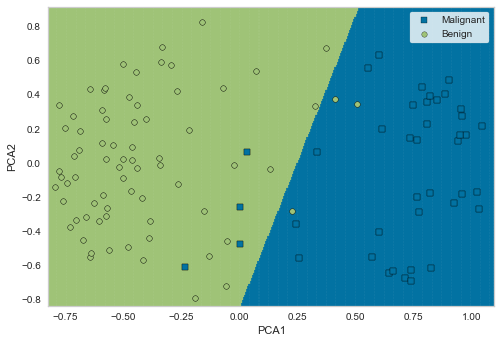

Score: 0.9428571428571428
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        41
           1       0.95      0.96      0.95        73

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



C:\Users\Sayan\anaconda3\envs\tf\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


In [93]:
cls=DecisionViz(
    SVC(kernel="linear", C=0.025), title="Linear SVM",
    features=['PCA1', 'PCA2'], classes=['Malignant', 'Benign']
)
xtrain, xtest, ytrain, ytest = train_test_split(data_2d, data.target, random_state=28, test_size=0.2)
cls.fit(xtrain, ytrain)
cls.draw(xtest, ytest)
cls.show()
print('Score:', cls.score(xtrain, ytrain))
print(classification_report(ytest, cls.predict(xtest)))

### PCA1 model

In [96]:
cls=SVC()
xtrain, xtest, ytrain, ytest = train_test_split(data_1d, data.target, random_state=28, test_size=0.2)
cls.fit(xtrain, ytrain)
print('Score:', cls.score(xtrain, ytrain))
print(classification_report(ytest, cls.predict(xtest)))

Score: 0.9274725274725275
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        41
           1       0.92      0.95      0.93        73

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



### PCA3 model

In [97]:
cls=SVC()
xtrain, xtest, ytrain, ytest = train_test_split(data_3d, data.target, random_state=28, test_size=0.2)
cls.fit(xtrain, ytrain)
print('Score:', cls.score(xtrain, ytrain))
print(classification_report(ytest, cls.predict(xtest)))

Score: 0.9516483516483516
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        41
           1       0.96      0.92      0.94        73

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



### All variable model

In [98]:
cls=SVC()
xtrain, xtest, ytrain, ytest = train_test_split(scaled_data, data.target, random_state=28, test_size=0.2)
cls.fit(xtrain, ytrain)
print('Score:', cls.score(xtrain, ytrain))
print(classification_report(ytest, cls.predict(xtest)))

Score: 0.9912087912087912
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.99      0.96      0.97        73

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

